In [9]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [10]:
img = cv2.imread("circulo_cromatico.jpeg")
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img/255

In [11]:
print(np.shape(img))
print(img[0][0][0], img[0][0][1], img[0][0][2])
print(np.argmax(img[0][0], axis=0))

(794, 800, 3)
1.0 1.0 1.0
0


In [12]:
def rgb_to_hsv(rgb):
    r, g, b = rgb[0], rgb[1], rgb[2]
    cmax = max(r, g, b)
    cmin = min(r, g, b)

    v = cmax

    if v != 0:
        s = v - cmin
    else:
        s = 0
    
    h = 0
    if v == r:
        h = 60 * (g - b)/(v - cmin)
    if v == g:
        h = 120 + 60 * (b - r)/(v - cmin)
    if v == b:
        h = 240 + 60 * (r - g)/(v - cmin)
    

    return h, s, v

pixels = np.array(img)

# Converter os pixels de RGB para HSV
imagem_hsv = np.zeros_like(pixels, dtype=np.float32)
for i in range(pixels.shape[0]):
    for j in range(pixels.shape[1]):
        aux = rgb_to_hsv(pixels[i, j])
        imagem_hsv[i, j] = aux
    

/tmp/ipykernel_12306/2651630210.py:15: RuntimeWarning: invalid value encountered in scalar divide
  h = 60*(g-b)/(v-cmin)
/tmp/ipykernel_12306/2651630210.py:17: RuntimeWarning: invalid value encountered in scalar divide
  h = 120 + 60 * (b - r)/(v - cmin)
/tmp/ipykernel_12306/2651630210.py:19: RuntimeWarning: invalid value encountered in scalar divide
  h = 240 + 60 * (r - g)/(v - cmin)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(794, 800, 3)


/home/yonix42/.local/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


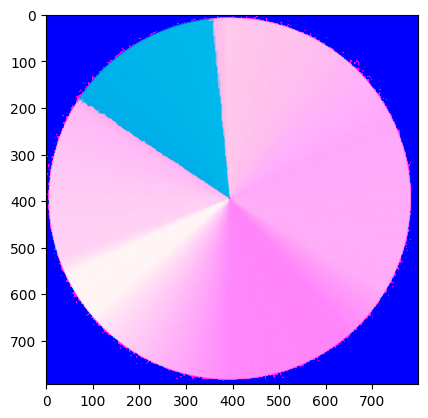

In [13]:
print(np.shape(imagem_hsv))

# Salvar a imagem convertida em HSV
plt.imshow(imagem_hsv)
plt.show()

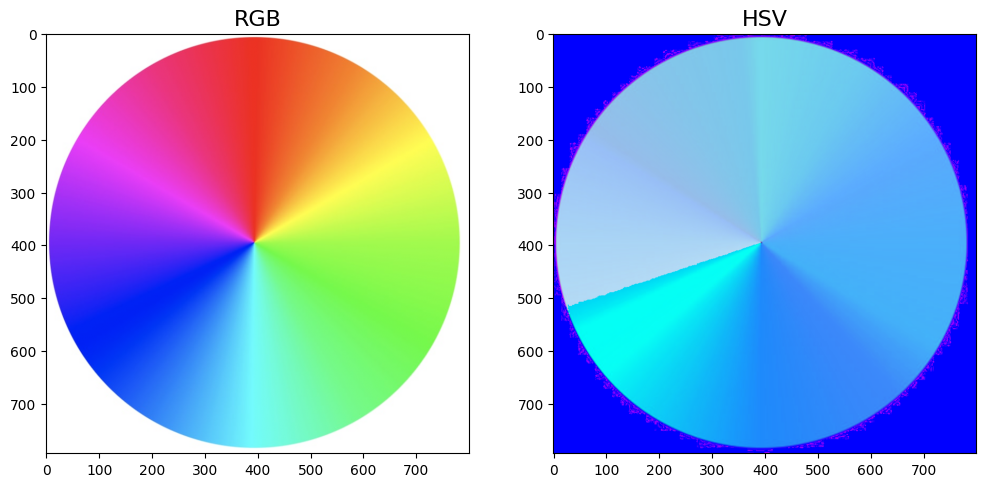

In [14]:
plt.figure(figsize = ((12, 6)))
plt.subplot(1, 2, 1)
plt.title("RGB", fontsize = 16)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(hsv_img)
plt.title("HSV", fontsize = 16)
plt.show()